<a href="https://www.kaggle.com/code/sandra07alex/is-it-a-bird-ipynb?scriptVersionId=182073945" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install fastbook fastai --upgrade



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 16.3 MB/s eta 0:00:00


In [2]:
from fastbook import *
from fastai.vision.all import *

In [3]:
urls = search_images_ddg('bird photos',max_images=1)
len(urls),urls[0]

(1,
 'http://s1.picswalls.com/wallpapers/2014/07/18/birds-high-definition_104547222_54.jpg')

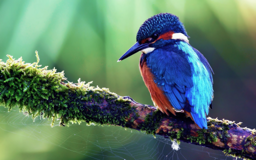

In [4]:
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

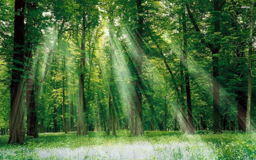

In [5]:
urls = search_images_ddg('forest photos',max_images=1)
dest = 'forest.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

In [6]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images_ddg(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images_ddg(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);
     

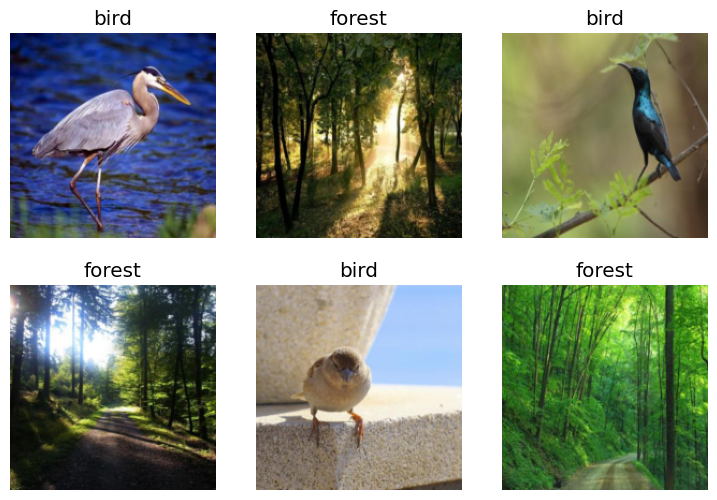

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 150MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.406374,0.277578,0.050228,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.131598,0.264658,0.054795,01:22
1,0.085104,0.339680,0.045662,01:20
2,0.055371,0.307122,0.036530,01:21


In [10]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9999
